In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from pathlib import Path

# Ensure the directory exists
Path('figures/1').mkdir(parents=True, exist_ok=True)

# Define the true function
def true_function(u):
    return 10 * np.sin(2 * np.pi * u)

# Generate data points
np.random.seed(0)
u = np.random.rand(30)
y = true_function(u) + np.random.normal(0, 2, 30)

# Fit polynomials
p2 = Polynomial.fit(u, y, 2)
p4 = Polynomial.fit(u, y, 4)
p16 = Polynomial.fit(u, y, 16)

# Polynomial functions
def poly_func(p, u):
    return p(u)

# Define colors
colors = {
    'green': '#5DAE50',
    'blue': '#3674BB',
    'light blue': '#84C1FF',
    'light light blue': '#B0DFFF',
    'yellow': '#FFE65E',
    'orange': '#FF8C42',
    'dark orange': '#C4571B',
    'purple': '#D48DFF'
}

# Plot function to avoid repetition
def plot_with_fit(u, y, fit_poly, fit_label, fit_color, file_name):
    plt.scatter(u, y, color=colors['blue'], marker='o', label='data points')
    u_plot = np.linspace(0, 1, 1000)
    plt.plot(u_plot, true_function(u_plot), color=colors['blue'], linestyle='--', linewidth=2, label='true')
    plt.plot(u_plot, poly_func(fit_poly, u_plot), color=fit_color, linewidth=2, label=fit_label)
    plt.ylim(-15, 15)
    plt.legend()
    plt.savefig(file_name)
    plt.clf()

# Plot all fits together
plt.scatter(u, y, color=colors['blue'], marker='o', label='data points')
u_plot = np.linspace(0, 1, 1000)
plt.plot(u_plot, true_function(u_plot), color=colors['blue'], linestyle='--', linewidth=2, label='true')
plt.plot(u_plot, poly_func(p2, u_plot), color=colors['purple'], linewidth=2, label='$p = 2$, underfit')
plt.plot(u_plot, poly_func(p4, u_plot), color=colors['orange'], linewidth=2, label='$p = 4$, balanced')
plt.plot(u_plot, poly_func(p16, u_plot), color=colors['green'], linewidth=2, label='$p = 16$, overfit')
plt.ylim(-15, 15)
plt.legend()
plt.savefig('figures/1/1_3_overfit_all.png')
plt.clf()

# Plot individual fits
plot_with_fit(u, y, p2, '$p = 2$, underfit', colors['purple'], 'figures/1/1_3_overfit_p2.png')
plot_with_fit(u, y, p4, '$p = 4$, balanced', colors['orange'], 'figures/1/1_3_overfit_p4.png')
plot_with_fit(u, y, p16, '$p = 16$, overfit', colors['green'], 'figures/1/1_3_overfit_p16.png')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

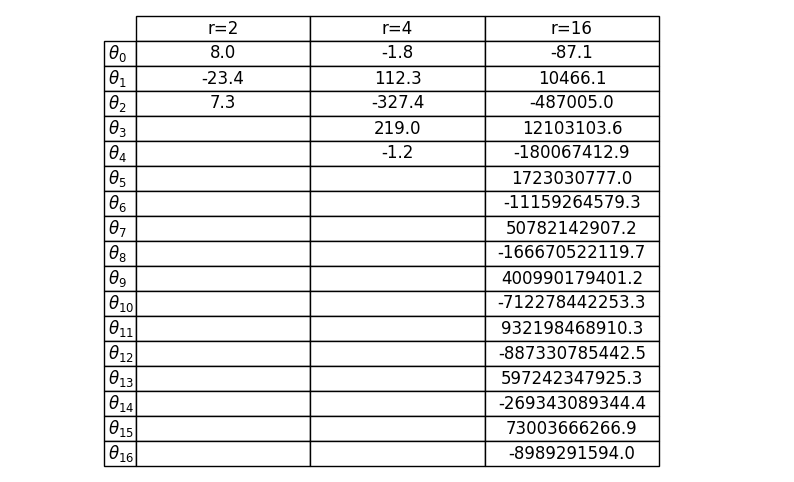

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from pathlib import Path
import pandas as pd

# Ensure the directory exists
output_dir = Path('figures/1_3')
output_dir.mkdir(parents=True, exist_ok=True)

# Define the true function
def true_function(u):
    return 10 * np.sin(2 * np.pi * u)

# Generate data points
np.random.seed(0)
u = np.random.rand(30)
y = true_function(u) + np.random.normal(0, 2, 30)

# Fit polynomials
degrees = [2, 4, 16]
polynomials = [Polynomial.fit(u, y, deg) for deg in degrees]

# Define colors
colors = {
    'green': '#008000',
    'blue': '#0000FF',
    'light blue': '#ADD8E6',
    'light light blue': '#E0FFFF',
    'yellow': '#FFFF00',
    'orange': '#FFA500',
    'dark orange': '#FF8C00',
    'purple': '#800080'
}

# Plot function to avoid repetition
def plot_with_fit(u, y, fit_poly, fit_label, fit_color, file_name):
    plt.scatter(u, y, color=colors['blue'], marker='o', label='data points')
    u_plot = np.linspace(0, 1, 1000)
    plt.plot(u_plot, true_function(u_plot), color=colors['blue'], linestyle='--', linewidth=2, label='true')
    plt.plot(u_plot, fit_poly(u_plot), color=fit_color, linewidth=2, label=fit_label)
    plt.ylim(-15, 15)
    plt.legend()
    plt.savefig(file_name)
    plt.clf()

# Plot all fits together
plt.scatter(u, y, color=colors['blue'], marker='o', label='data points')
u_plot = np.linspace(0, 1, 1000)
plt.plot(u_plot, true_function(u_plot), color=colors['blue'], linestyle='--', linewidth=2, label='true')
for p, r, color in zip(polynomials, degrees, ['purple', 'orange', 'green']):
    plt.plot(u_plot, p(u_plot), color=colors[color], linewidth=2, label=f'$r = {r}$')
plt.ylim(-15, 15)
plt.legend()
plt.savefig(output_dir / '1_3_overfit_all.png')
plt.clf()

# Plot individual fits
for p, r, color in zip(polynomials, degrees, ['purple', 'orange', 'green']):
    plot_with_fit(u, y, p, f'$r = {r}$', colors[color], output_dir / f'1_3_overfit_r{r}.png')

# Extract polynomial coefficients and create table
max_degree = max(degrees)
coefficients = {
    f'$\\theta_{{{i}}}$': [round(p.convert().coef[i], 1) if len(p.convert().coef) > i else '' for p in polynomials] 
    for i in range(max_degree + 1)
}
df = pd.DataFrame(coefficients, index=[f'r={r}' for r in degrees]).T

# Save table to CSV
csv_file = output_dir / 'polynomial_coefficients.csv'
df.to_csv(csv_file)

# Display the table as an image using pandas plotting functionality
fig, ax = plt.subplots(figsize=(10, 6)) 
ax.axis('off') 
tbl = pd.plotting.table(ax, df, cellLoc='center', loc='center', colWidths=[0.15]*len(df.columns))
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
tbl.scale(1.5, 1.5)
plt.savefig(output_dir / 'polynomial_coefficients.png')
plt.show()